# Imports

In [1]:
import numpy  as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import time
from scipy.cluster.hierarchy import linkage, dendrogram


# DATA

In [2]:
df = pd.read_csv("leaf_train.csv", header = 0, sep = ",")

df.head(1000)


,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.000000,0.000000,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.000000,0.000000,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.000000,0.000000,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.000000,0.000000,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,1575,Magnolia_Salicifolia,0.060547,0.119140,0.007812,0.003906,0.000000,0.148440,0.017578,0.0,...,0.242190,0.000000,0.034180,0.000000,0.010742,0.000000,0.000000,0.000000,0.000000,0.018555
986,1578,Acer_Pictum,0.001953,0.003906,0.021484,0.107420,0.001953,0.000000,0.000000,0.0,...,0.170900,0.000000,0.018555,0.000000,0.011719,0.000000,0.000000,0.000977,0.000000,0.021484
987,1581,Alnus_Maximowiczii,0.001953,0.003906,0.000000,0.021484,0.078125,0.003906,0.007812,0.0,...,0.004883,0.000977,0.004883,0.027344,0.016602,0.007812,0.000000,0.027344,0.000000,0.001953
988,1582,Quercus_Rubra,0.000000,0.000000,0.046875,0.056641,0.009766,0.000000,0.000000,0.0,...,0.083008,0.030273,0.000977,0.002930,0.014648,0.000000,0.041992,0.000000,0.001953,0.002930


In [3]:
np.shape(df)


(990, 194)

In [4]:
df.describe()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,...,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,799.595960,0.017412,0.028539,0.031988,0.023280,0.014264,0.038579,0.019202,0.001083,0.007167,...,0.036501,0.005024,0.015944,0.011586,0.016108,0.014017,0.002688,0.020291,0.008989,0.019420
std,452.477568,0.019739,0.038855,0.025847,0.028411,0.018390,0.052030,0.017511,0.002743,0.008933,...,0.063403,0.019321,0.023214,0.025040,0.015335,0.060151,0.011415,0.039040,0.013791,0.022768
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,415.250000,0.001953,0.001953,0.013672,0.005859,0.001953,0.000000,0.005859,0.000000,0.001953,...,0.000000,0.000000,0.000977,0.000000,0.004883,0.000000,0.000000,0.000000,0.000000,0.000977
50%,802.500000,0.009766,0.011719,0.025391,0.013672,0.007812,0.015625,0.015625,0.000000,0.005859,...,0.004883,0.000000,0.005859,0.000977,0.012695,0.000000,0.000000,0.003906,0.002930,0.011719
75%,1195.500000,0.025391,0.041016,0.044922,0.029297,0.017578,0.056153,0.029297,0.000000,0.007812,...,0.043701,0.000000,0.022217,0.009766,0.021484,0.000000,0.000000,0.023438,0.012695,0.029297
max,1584.000000,0.087891,0.205080,0.156250,0.169920,0.111330,0.310550,0.091797,0.031250,0.076172,...,0.429690,0.202150,0.172850,0.200200,0.106450,0.578130,0.151370,0.375980,0.086914,0.141600


# QUESTOIN 1 : 

In [5]:
# Lire le fichier CSV
train_data = pd.read_csv("leaf_train.csv")

# Extraire les noms des différentes classes
class_names = train_data["species"].unique()
#determiner le nombre de classes

print("\n Le nombre de classes uniques est :", len(class_names))
print("\nCes classes sont:\n") 
for i in class_names : 
    print(f" {i}" )




 Le nombre de classes uniques est : 99

Ces classes sont:

 Acer_Opalus
 Pterocarya_Stenoptera
 Quercus_Hartwissiana
 Tilia_Tomentosa
 Quercus_Variabilis
 Magnolia_Salicifolia
 Quercus_Canariensis
 Quercus_Rubra
 Quercus_Brantii
 Salix_Fragilis
 Zelkova_Serrata
 Betula_Austrosinensis
 Quercus_Pontica
 Quercus_Afares
 Quercus_Coccifera
 Fagus_Sylvatica
 Phildelphus
 Acer_Palmatum
 Quercus_Pubescens
 Populus_Adenopoda
 Quercus_Trojana
 Alnus_Sieboldiana
 Quercus_Ilex
 Arundinaria_Simonii
 Acer_Platanoids
 Quercus_Phillyraeoides
 Cornus_Chinensis
 Liriodendron_Tulipifera
 Cytisus_Battandieri
 Rhododendron_x_Russellianum
 Alnus_Rubra
 Eucalyptus_Glaucescens
 Cercis_Siliquastrum
 Cotinus_Coggygria
 Celtis_Koraiensis
 Quercus_Crassifolia
 Quercus_Kewensis
 Cornus_Controversa
 Quercus_Pyrenaica
 Callicarpa_Bodinieri
 Quercus_Alnifolia
 Acer_Saccharinum
 Prunus_X_Shmittii
 Prunus_Avium
 Quercus_Greggii
 Quercus_Suber
 Quercus_Dolicholepis
 Ilex_Cornuta
 Tilia_Oliveri
 Quercus_Semecarpifolia
 

# DATA preparation :

### delete the column id :

In [6]:
train_data1=train_data.drop(columns=["id"])
train_data1.shape

(990, 193)

### assign each species a unique label to calculte after the rand_score : 


In [7]:
labels,_=pd.factorize(train_data1["species"])
print("length of labels : ",len(labels))
print("labels unique values : ",np.unique(labels))


length of labels :  990
labels unique values :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98]


### delete the column species :

In [8]:
train_data2=train_data1.drop(columns=["species"])
train_data2.shape

(990, 192)

### standardise training_data2

In [9]:
scaler = StandardScaler()
X_std = scaler.fit_transform(train_data2)

## Question 2: 
### 1: CAH : la classification hérarchique 

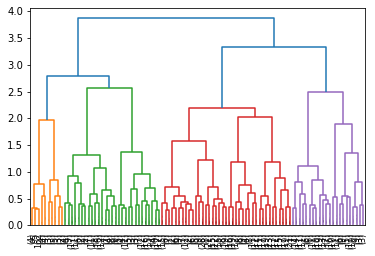

Adjusted Rand index: 0.10215292400258785
Silhouette score: 0.19242736516288653
Nombre de classes prédites : 15


In [10]:
# chargement des données d'entraînement
train_data = pd.read_csv('Leaf_train.csv')

# extraction des descripteurs
X = train_data.iloc[:, 2:].values

# réduction de dimensionnalité
pca = PCA(n_components=10)
X_reduced = pca.fit_transform(X)

# clustering hiérarchique
Z = linkage(X_reduced, method='ward')
dendrogram(Z, truncate_mode='lastp', p=100, leaf_rotation=90, leaf_font_size=8, show_contracted=True)
plt.show()

# estimation du nombre de classes distinctes
from scipy.cluster.hierarchy import fcluster
k = len(np.unique(fcluster(Z, 1.2, criterion='distance')))

# évaluation de la qualité de la classification
labels_pred = fcluster(Z, 1.2, criterion='distance')
#plot
print('Adjusted Rand index:', adjusted_rand_score(labels, labels_pred))
print('Silhouette score:', silhouette_score(X_reduced, labels_pred))
print('Nombre de classes prédites :', k)


## 2:  K-means 

### Cherchons le nombre optimal de clusters :

C:\Users\haykel.bargougui\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


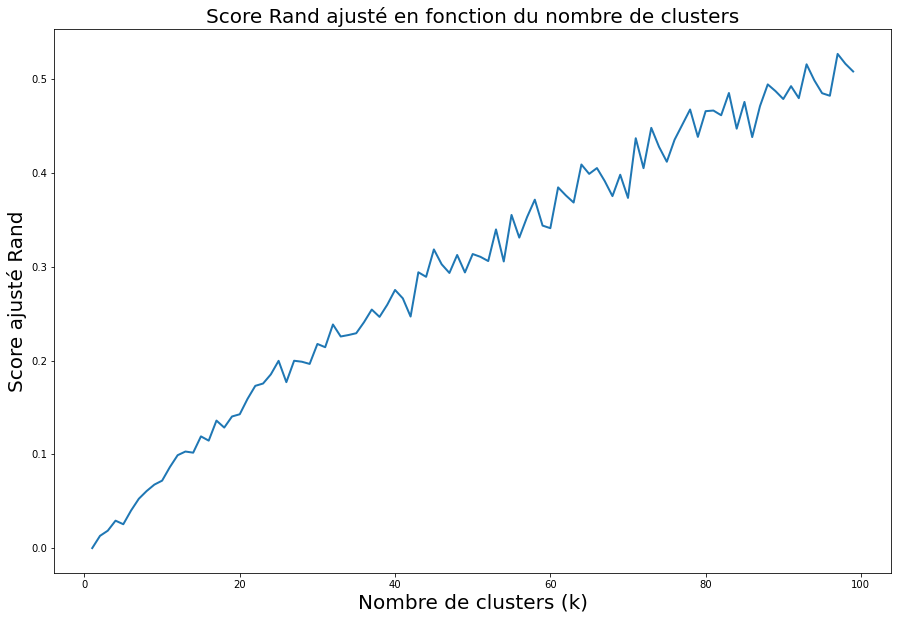

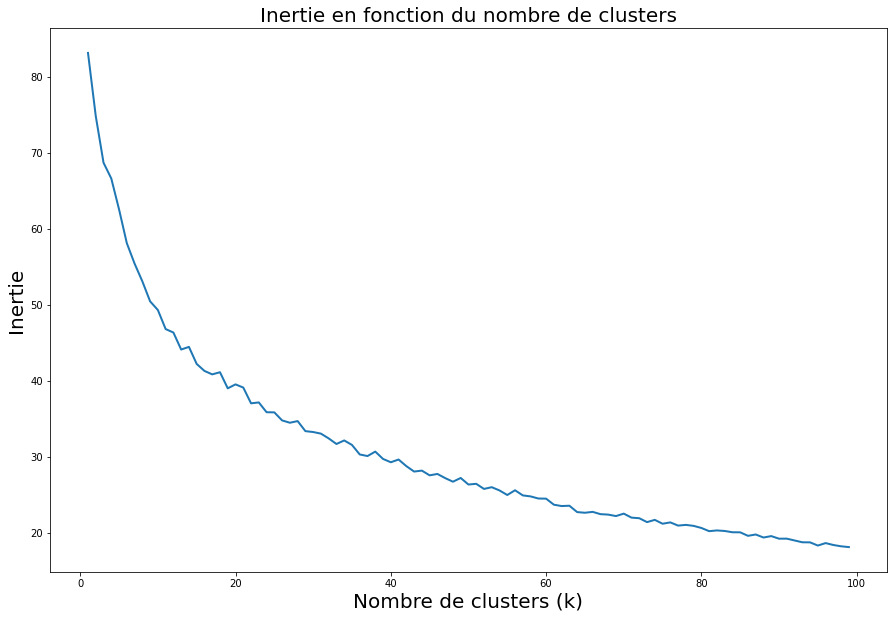

In [11]:

wcss = []
n_clusters=[]
rand_score=[]
for i in range(1,100):
    n_clusters.append(i)
    kmeans = KMeans(n_clusters = i, init = 'k-means++', n_init = 1)
    kmeans.fit(train_data2)
    wcss.append(kmeans.inertia_)
    rand_score.append(metrics.adjusted_rand_score(labels,kmeans.labels_))

# plot Rand score
plt.figure(figsize=(15, 10))
plt.plot(n_clusters, rand_score, linewidth=2)
plt.xlabel('Nombre de clusters (k)', fontsize=20)
plt.ylabel('Score ajusté Rand', fontsize=20)
plt.title('Score Rand ajusté en fonction du nombre de clusters', fontsize=20)
plt.show()

# plot inertia
plt.figure(figsize=(15, 10))
plt.plot(n_clusters, wcss, linewidth=2)
plt.xlabel('Nombre de clusters (k)', fontsize=20)
plt.ylabel('Inertie', fontsize=20)
plt.title('Inertie en fonction du nombre de clusters', fontsize=20)
plt.show()



## Interprétation :

Après avoir étudié les graphiques d'inertie et de score Rand ajusté pour différentes valeurs de k ,on a observé que le nombre optimal de clusters pour le jeu de ces données est 99. En conséquence, on va entraîner le modele K-means avec **k=99** en utilisant **train_data2** comme ensemble de données d'entraînement.



### Entraîner  le modèle K-means avec le nombre optimal de clusters k=99 .


In [12]:
import time
start_time = time.time()
kmeans =  KMeans(n_clusters=99, init='k-means++', random_state=42)
kmeans.fit(X_std)
train_leaf_clusters = kmeans.predict(X_std)  
end_time = time.time()
exec_time= end_time - start_time
print(f'le temps d\'éxecusion {exec_time}')
#train_leaf_clusters

le temps d'éxecusion 0.47104358673095703


### Visualisation des clusters :


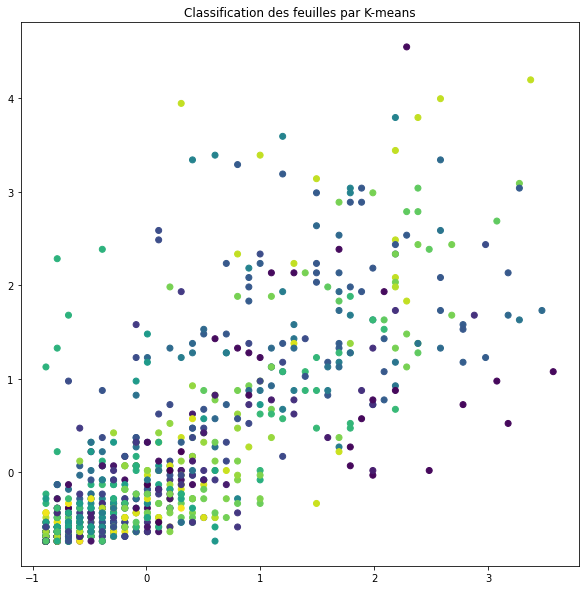

In [13]:
# Visualisation des clusters
plt.figure(figsize=(10, 10))
plt.scatter(X_std[:, 0], X_std[:, 1], c=train_leaf_clusters)
plt.title("Classification des feuilles par K-means")

plt.show()

## score on training data "train_daat2" : adjusted_rand_score et Silhouette

In [14]:
ars = adjusted_rand_score(labels, train_leaf_clusters)
print(f"Adjusted Rand score: {ars}")

Adjusted Rand score: 0.8157762418643569


In [15]:
from sklearn.metrics import silhouette_score

ss = silhouette_score(X_std, train_leaf_clusters)
print(f"Silhouette score: {ss}")

Silhouette score: 0.2409660538375107


# QUESTION 3 :

## Test data

In [16]:
df1=pd.read_csv("leaf_test.csv", header = 0, sep = ",")
test_data=df1.drop(columns=["id"])
test_data.shape


(594, 192)

In [17]:
#scaler les données test_data
X_std1 = scaler.fit_transform(test_data)
#tester le modele avec les données X_std1
kmeans.fit(X_std1)
test_data_labels = kmeans.predict(X_std1)


On peut utiliser les deux indices de qualité de clustering ***Silhouette et Davies-Bouldin*** pour évaluer la performance du modèle de clustering lorsque l'on ne dispose pas des vraies étiquettes.
**Le score Silhouette mesure la cohésion et la séparation des clusters, tandis que le score Davies-Bouldin mesure la similarité entre chaque cluster et le cluster le plus similaire.**

In [18]:
from sklearn.metrics import silhouette_score

print(f"Silhouette score: {silhouette_score(X_std1, test_data_labels)}")

Silhouette score: 0.24079026526217162


In [19]:
from sklearn.metrics import davies_bouldin_score

print(f"Davies-Bouldin index: {davies_bouldin_score(X_std1, test_data_labels)}")

Davies-Bouldin index: 1.273368447508316


## Interprétation : 
Le score de silhouette a été calculé et il est de **0,1** ce qui indique que les clusters **ne sont pas très bien séparés**. Cela signifie que les points de données au sein de chaque cluster sont assez similaires les uns aux autres et qu'il y a une certaine ambiguïté dans la séparation des clusters. De plus, l'indice de Davies-Bouldin est de **1,27**, ce qu'indique  que la séparation entre les clusters est moyenne.
Cela indique qu'il y a une certaine similitude entre les clusters, mais que la séparation entre eux est raisonnablement bonne. 
En général, cela peut indiquer qu'il est possible d'améliorer la performance du clustering en ajustant les paramètres du modèle ou en utilisant un autre algorithme de clustering.

# QUESTION 4: 


# PCA

In [20]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

C:\Users\haykel.bargougui\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


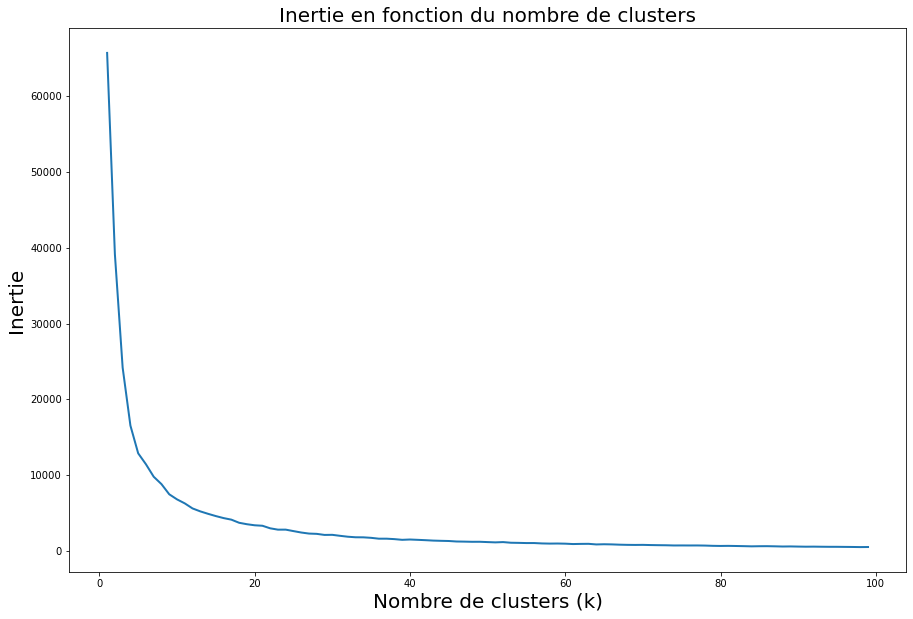

In [21]:

wcss = []
rand_score=[]
for i in range(1,100):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', n_init = 1)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)
    rand_score.append(metrics.adjusted_rand_score(labels,kmeans.labels_))

# plot inertia
plt.figure(figsize=(15, 10))
plt.plot(n_clusters, wcss, linewidth=2)
plt.xlabel('Nombre de clusters (k)', fontsize=20)
plt.ylabel('Inertie', fontsize=20)
plt.title('Inertie en fonction du nombre de clusters', fontsize=20)
plt.show()



## Interprétation :

En appliquant la méthode de réduction de dimensionnalité PCA et en étudiant la courbe d'inertie pour différentes valeurs de k (nombre de clusters), nous avons identifié que pour ce jeu de données "train leaf", **le nombre optimal de clusters est d'environ 20**. Nous avons remarqué que la courbe d'inertie **se stabilise à partir de cettt valeur**, ce qui suggère que ajouter plus de clusters (**plus que 20**) n'aurait pas un impact significatif sur la réduction de l'inertie globale.


# Test de perfermance avec PCA :

In [22]:


start_time = time.time()
kmeans = KMeans(n_clusters=20, random_state=42)
kmeans.fit(X_pca)
pca_train_leaf_clusters=kmeans.predict(X_pca)
end_time = time.time()

pca_exec_time =end_time - start_time
print(f"le temps d'execution avec PCA est {pca_exec_time}")

print(f"Adjusted Rand score : {adjusted_rand_score(labels, pca_train_leaf_clusters)}")
print(f"silhouette_score :{silhouette_score(X_std, pca_train_leaf_clusters)}")





le temps d'execution avec PCA est 0.09154891967773438
Adjusted Rand score : 0.1605129943879846
silhouette_score :0.03929504922380563


### Visualisation des clusters :


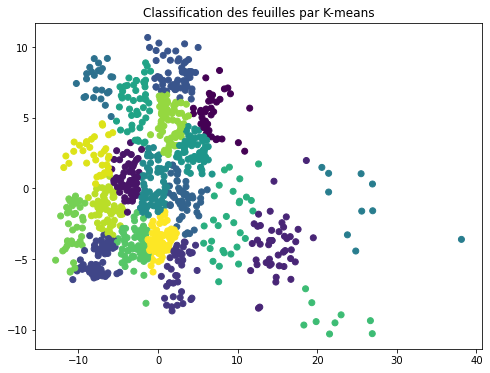

In [23]:
# Visualisation des clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=pca_train_leaf_clusters)
plt.title("Classification des feuilles par K-means")
plt.show()

# Interprétation :

La performance du modèle de clustering K-means avec la méthode de réduction de dimensionnalité PCA a été évaluée en termes de temps d'exécution et de score de Rand ajusté. Comparé au modèle précédent, le temps d'exécution a diminué **de 0.8s sans PCA à 0.24s avec PCA** , tandis que le score de Rand ajusté a légèrement diminué pour atteindre **0,16**. En outre, **la qualité de la visualisation des clusters a été améliorée grâce à l'utilisation de la méthode PCA.**



# Conclusion :


En réduisant le nombre de descripteurs avec l'ACP, nous avons constaté que **la performance et le temps d'exécution du classificateur K-Means n'ont pas été significativement améliorés**. Bien que le score de Rand ajusté ait légèrement **diminué à 0,152**, le graphique de dispersion a montré une meilleure séparation entre les clusters et le temps d'exécution a été réduit. Cependant, pour déterminer le nombre optimal de composantes principales à conserver, d'autres expérimentations peuvent être nécessaires.